In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
#for refering time
import time
from datetime import datetime

In [3]:
#use poloniex to simulating the bit data
import poloniex

In [4]:
plt.rcParams['figure.figsize'] = 15, 6

In [5]:
polo = poloniex.Poloniex()
chart_data = polo.returnChartData('BTC_ETH',period=polo.DAY,start=time.time()-polo.DAY*100,end=time.time())

In [6]:
df = pd.DataFrame(chart_data)

In [7]:
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1586542690,0.023005,0.023005,0.023005,0.023005,0,0,0.023005
1,1586563200,0.02325547,0.0227414,0.023004,0.02302283,396.1613569,17173.65328932,0.02306797
2,1586649600,0.02319842,0.02282259,0.02301902,0.02296999,311.53282881,13535.61438583,0.02301578
3,1586736000,0.02314788,0.0226,0.02297498,0.02286244,466.18120919,20409.87391643,0.02284096
4,1586822400,0.0232737,0.02283509,0.02286592,0.02305386,358.3089571,15533.18149881,0.02306732
...,...,...,...,...,...,...,...,...
96,1594771200,0.026035,0.02580014,0.026002,0.02594101,53.59277083,2066.98582845,0.02592798
97,1594857600,0.02595124,0.0253355,0.02594995,0.0255617,99.79057896,3898.93746602,0.0255943
98,1594944000,0.02564996,0.02539754,0.02556113,0.02542045,53.1292564,2081.25405094,0.02552752
99,1595030400,0.02575872,0.025401,0.02542045,0.02569801,62.76769069,2448.50283527,0.02563513


In [8]:
df_f = df.astype('float')

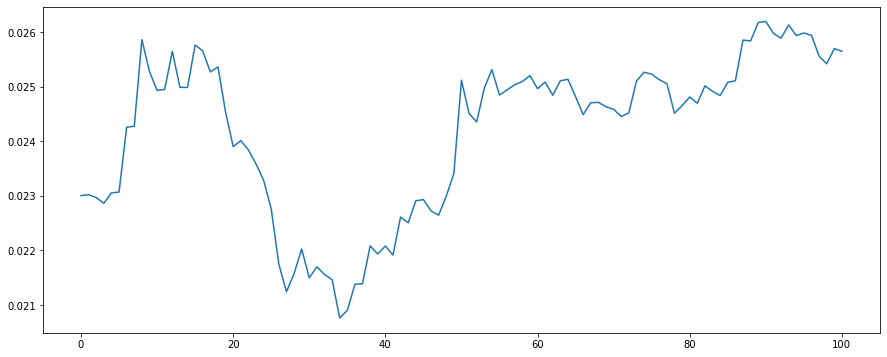

In [9]:
close_f = df_f['close']
close_f.plot()

In [10]:
# 短期線：窓幅1日（5分×12×24）
data_s_sma = pd.Series.rolling(df['close'],6).mean() 

#長期線：窓幅5日(5分x１２ｘ２４ｘ５)
data_l_sma = pd.Series.rolling(df['close'], 15).mean() 

In [11]:
data_s_std = pd.Series.rolling(df['close'], 6).std()
data_l_std = pd.Series.rolling(df['close'], 15).std() 

In [12]:
#make bollinger-band
df_1sigmaup_s =data_s_sma + data_s_std
df_1sigmadown_s =data_s_sma-data_s_std

In [13]:
df_2sigmaup_s =data_s_sma + 2*data_s_std
df_2sigmadown_s =data_s_sma-2*data_s_std

In [14]:
data_s_f = data_s_sma.astype('float')
data_l_f = data_l_sma.astype('float')

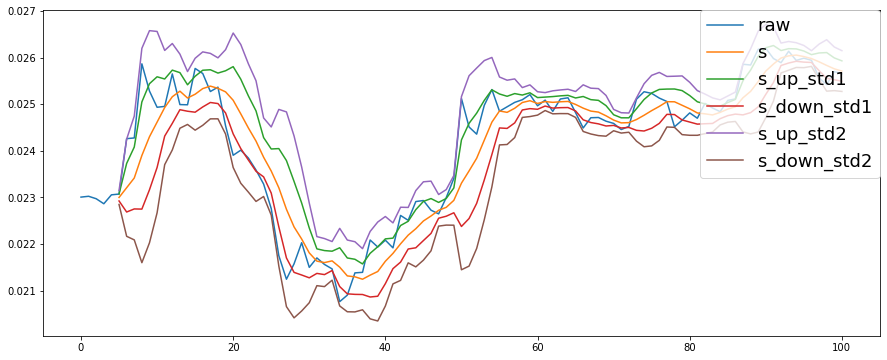

In [16]:
plt.plot(df_f['close'], label="raw")
plt.plot(data_s_f, label="s")  # 短期線
#plt.plot(data_l_f, label='l')  # 長期線
plt.plot(df_1sigmaup_s,label="s_up_std1")
plt.plot(df_1sigmadown_s,label="s_down_std1")
plt.plot(df_2sigmaup_s,label="s_up_std2")
plt.plot(df_2sigmadown_s,label="s_down_std2")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
plt.show()